In [2]:
from matplotlib import pyplot as plt
import numpy as np
# import seaborn as sns

In [3]:
# Load dataset
dataset_zip = np.load('dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='latin1')

print('Keys in the dataset:', list(dataset_zip.keys()))

Keys in the dataset: ['metadata', 'imgs', 'latents_classes', 'latents_values']


In [46]:
idx = 737279

color 1.0
shape 3.0
scale 1.0
orientation 6.283185307179586
posX 1.0
posY 1.0


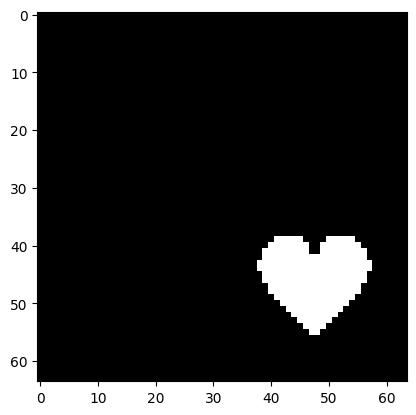

In [47]:
# print(dataset_zip['latents_values'][idx])
# print(dataset_zip['latents_classes'][idx])
for name, value in zip(dataset_zip['metadata'][()]['latents_names'], dataset_zip['latents_values'][idx]):
    print(name, value)
#plot image
img = dataset_zip["imgs"][idx]
plt.imshow(img, cmap='gray')

array([0, 0, 0, 0, 0, 0])

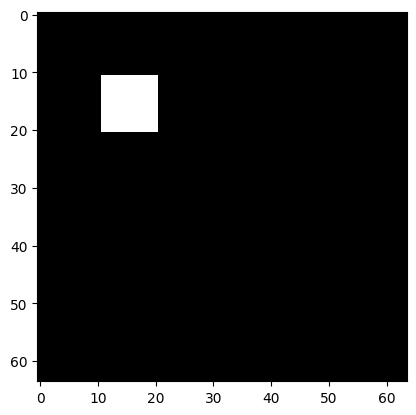

In [6]:
metadata = dataset_zip['metadata'][()]

In [7]:
metadata.keys()

dict_keys(['date', 'description', 'version', 'latents_names', 'latents_possible_values', 'latents_sizes', 'author', 'title'])

In [9]:
metadata['latents_names']

('color', 'shape', 'scale', 'orientation', 'posX', 'posY')

In [23]:
metadata['latents_sizes']

array([ 1,  3,  6, 40, 32, 32], dtype=int64)

In [24]:
def disentanglement_metric_score(D, K, L):
    # D = {X, V, W} dataset
    # K = number of factors
    # L = number of samples
    
    # Choose a factor y ∼ Unif[1...K]
    y = np.random.randint(1, K+1)
    
    # For a batch of L samples:
    z_diff = []
    for l in range(L):
        # Sample two sets of latent representations v1,l and v2,l
        v1_l = torch.randn(K)
        v2_l = torch.randn(K)
        
        # Enforce [v1,l]k = [v2,l]k if k = y (so that the value of factor k = y is kept fixed)
        v1_l[y-1] = v2_l[y-1]
        
        # Simulate image x1,l ∼ Sim(v1,l), then infer z1,l = µ(x1,l), using the encoder q(z|x) ∼ N (µ(x), σ(x))
        x1_l = Sim(v1_l)
        z1_l = encoder(x1_l)
        
        # Repeat the process for v2,l
        x2_l = Sim(v2_l)
        z2_l = encoder(x2_l)
        
        # Compute the difference z_diff[l] = |z1,l − z2,l|, the absolute linear difference between the inferred latent representations
        z_diff.append(torch.abs(z1_l - z2_l))
    
    # Use the average z_diff to predict p(y|z_diff) and report the accuracy of this predictor as disentangement metric score
    z_diff_avg = torch.mean(torch.stack(z_diff))
    return predict_y(z_diff_avg)

KeyError: 'latents_bases'